In [1]:
import pandas as pd
df = pd.read_csv('mobile data.csv')

In [2]:
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()

In [3]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            772     0          1.1         1  12       0          39    0.8   
1           1709     1          2.1         0   1       0          13    1.0   
2           1949     0          2.6         1   4       0          47    0.3   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0         81        7  ...       1314      1854  2819    17    15          3   
1        156        2  ...        974      1385  3283    17     1         15   
2        199        4  ...        407       822  1433    11     5         20   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        1             1     0            3  
1        1             0     0            3  
2        0             0     1            1  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
df.rename({'price_range' : 'price'}, axis=1, inplace=True)

In [9]:
x = df.drop('price', axis = 1)
y = df.price

In [15]:
col_val = pd.DataFrame(x.columns, columns= ['ColInfo'])
col_val

ColInfo
0   battery_power
1            blue
2     clock_speed
3        dual_sim
4              fc
5          four_g
6      int_memory
7           m_dep
8       mobile_wt
9         n_cores
10             pc
11      px_height
12       px_width
13            ram
14           sc_h
15           sc_w
16      talk_time
17        three_g
18   touch_screen
19           wifi

ExtraTree Classifier

In [10]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()

In [11]:
etc.fit(x, y)

ExtraTreesClassifier()

In [13]:
info_gain = pd.DataFrame(etc.feature_importances_, columns=['InfoGain'])
info_gain

InfoGain
0   0.060848
1   0.020595
2   0.033391
3   0.019670
4   0.033170
5   0.017994
6   0.035076
7   0.032793
8   0.037797
9   0.032312
10  0.033748
11  0.047607
12  0.047130
13  0.390566
14  0.033756
15  0.034568
16  0.035271
17  0.014856
18  0.018580
19  0.020273

In [18]:
total_df = pd.concat([col_val, info_gain], axis=1)
total_df

ColInfo  InfoGain
0   battery_power  0.060848
1            blue  0.020595
2     clock_speed  0.033391
3        dual_sim  0.019670
4              fc  0.033170
5          four_g  0.017994
6      int_memory  0.035076
7           m_dep  0.032793
8       mobile_wt  0.037797
9         n_cores  0.032312
10             pc  0.033748
11      px_height  0.047607
12       px_width  0.047130
13            ram  0.390566
14           sc_h  0.033756
15           sc_w  0.034568
16      talk_time  0.035271
17        three_g  0.014856
18   touch_screen  0.018580
19           wifi  0.020273

In [20]:
new_df = total_df.nlargest(18, 'InfoGain')
new_df

ColInfo  InfoGain
13            ram  0.390566
0   battery_power  0.060848
11      px_height  0.047607
12       px_width  0.047130
8       mobile_wt  0.037797
16      talk_time  0.035271
6      int_memory  0.035076
15           sc_w  0.034568
14           sc_h  0.033756
10             pc  0.033748
2     clock_speed  0.033391
4              fc  0.033170
7           m_dep  0.032793
9         n_cores  0.032312
1            blue  0.020595
19           wifi  0.020273
3        dual_sim  0.019670
18   touch_screen  0.018580

In [28]:
new_df.plot(kind = 'barh', color = 'Lightblue')

<AxesSubplot:>

KBest Classifier

In [30]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
skb = SelectKBest(score_func= chi2)

In [31]:
skb.fit(x, y)

SelectKBest(score_func=<function chi2 at 0x00000218B8386D30>)

In [33]:
scores = pd.DataFrame(skb.scores_, columns=['kscore'])
scores

kscore
0    13958.691431
1        0.697327
2        0.805208
3        0.721202
4       10.879248
5        1.677552
6       91.077721
7        0.818369
8       96.834986
9        8.943437
10       9.716307
11   17387.822803
12    9758.340687
13  932330.107389
14       9.521543
15      15.777169
16      13.540802
17       0.314971
18       2.172639
19       0.387644

In [35]:
kbest = pd.concat([col_val, scores], axis=1)
kbest

ColInfo         kscore
0   battery_power   13958.691431
1            blue       0.697327
2     clock_speed       0.805208
3        dual_sim       0.721202
4              fc      10.879248
5          four_g       1.677552
6      int_memory      91.077721
7           m_dep       0.818369
8       mobile_wt      96.834986
9         n_cores       8.943437
10             pc       9.716307
11      px_height   17387.822803
12       px_width    9758.340687
13            ram  932330.107389
14           sc_h       9.521543
15           sc_w      15.777169
16      talk_time      13.540802
17        three_g       0.314971
18   touch_screen       2.172639
19           wifi       0.387644

In [37]:
kb_df = kbest.nlargest(18, 'kscore')
kb_df

ColInfo         kscore
13            ram  932330.107389
11      px_height   17387.822803
0   battery_power   13958.691431
12       px_width    9758.340687
8       mobile_wt      96.834986
6      int_memory      91.077721
15           sc_w      15.777169
16      talk_time      13.540802
4              fc      10.879248
10             pc       9.716307
14           sc_h       9.521543
9         n_cores       8.943437
18   touch_screen       2.172639
5          four_g       1.677552
7           m_dep       0.818369
2     clock_speed       0.805208
3        dual_sim       0.721202
1            blue       0.697327

<AxesSubplot:>

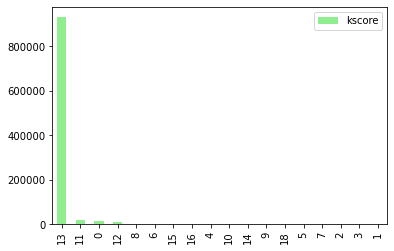

In [38]:
kb_df.plot(kind = 'bar', color = 'lightGreen')